In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Customer Segmentation RFM
- Recency Frequency Monetary (RFM)

- RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.

- Recency — how long it’s been since a customer bought something from us.
- Frequency — how often a customer buys from us.
- Monetary value — the total value of purchases a customer has made.

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
retail_df = df.copy()

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retail_df.describe().round(3)

,Quantity,UnitPrice,CustomerID
count,541909.000,541909.000,406829.000
mean,9.552,4.611,15287.691
std,218.081,96.760,1713.600
min,-80995.000,-11062.060,12346.000
25%,1.000,1.250,13953.000
50%,3.000,2.080,15152.000
75%,10.000,4.130,16791.000
max,80995.000,38970.000,18287.000


In [7]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail_df.dropna(inplace = True)

In [9]:
retail_df.shape

(406829, 8)

In [10]:
retail_df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [11]:
retail_df.groupby('Description').agg({"Quantity":"sum"}).sort_values("Quantity",ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [12]:
retail_df['InvoiceNo'].str.contains('C').count()

8905

In [13]:
retail_df[~retail_df['InvoiceNo'].str.contains('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
retail_df["TotalPrice"] = retail_df["Quantity"] * retail_df["UnitPrice"]

In [15]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


# Cohort Analysis

In [16]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
retail_df['InvoiceDay'] = retail_df['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = retail_df.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
retail_df['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceDay,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [17]:
def get_date_int(df,coulmn):
    year = df[coulmn].dt.year
    month = df[coulmn].dt.month
    day = df[coulmn].dt.day
    return year,month,day

In [18]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(retail_df, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(retail_df, 'CohortMonth')

In [19]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
retail_df['CohortIndex'] = years_diff * 12 + months_diff * 1 + 1
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceDay,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [20]:
# Create a pivot 
cohort_counts = retail_df.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID',aggfunc='nunique')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.428571,0.387755,0.326531,0.418367,0.408163,0.418367,0.357143,0.397959,0.408163,0.387755,0.448980,0.295918
2010-12-02,1.0,0.333333,0.370370,0.361111,0.379630,0.416667,0.407407,0.342593,0.361111,0.407407,0.379630,0.462963,0.231481
2010-12-03,1.0,0.428571,0.469388,0.428571,0.306122,0.408163,0.326531,0.408163,0.346939,0.306122,0.469388,0.469388,0.326531
2010-12-05,1.0,0.500000,0.367647,0.544118,0.352941,0.500000,0.470588,0.455882,0.441176,0.470588,0.529412,0.588235,0.294118
2010-12-06,1.0,0.328947,0.276316,0.394737,0.407895,0.486842,0.407895,0.434211,0.368421,0.434211,0.328947,0.565789,0.250000


In [21]:
# Calculate churn
churn = 1 - retention
churn

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,0.0,0.571429,0.612245,0.673469,0.581633,0.591837,0.581633,0.642857,0.602041,0.591837,0.612245,0.551020,0.704082
2010-12-02,0.0,0.666667,0.629630,0.638889,0.620370,0.583333,0.592593,0.657407,0.638889,0.592593,0.620370,0.537037,0.768519
2010-12-03,0.0,0.571429,0.530612,0.571429,0.693878,0.591837,0.673469,0.591837,0.653061,0.693878,0.530612,0.530612,0.673469
2010-12-05,0.0,0.500000,0.632353,0.455882,0.647059,0.500000,0.529412,0.544118,0.558824,0.529412,0.470588,0.411765,0.705882
2010-12-06,0.0,0.671053,0.723684,0.605263,0.592105,0.513158,0.592105,0.565789,0.631579,0.565789,0.671053,0.434211,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.28; Churn rate: 0.72


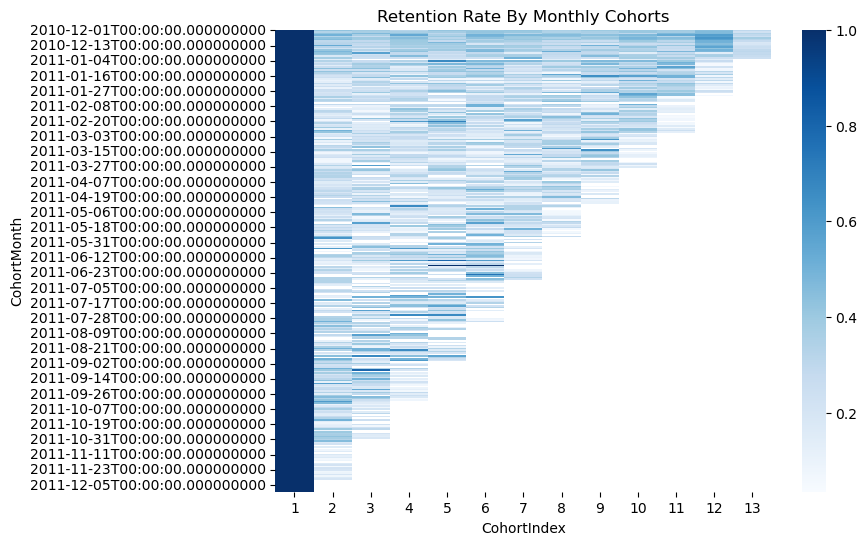

In [23]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Retention Rate By Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention, cmap='Blues')
plt.show()

In [24]:
average_price = retail_df.pivot_table(index='CohortMonth', columns='CohortIndex', values='UnitPrice',aggfunc='mean')
average_price.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.3,3.6,3.0,6.3,3.1,11.8,3.1,3.0,3.1,3.7,3.3,2.9,2.8
2010-12-02,3.3,3.0,3.3,3.5,2.7,4.1,4.3,3.0,3.7,2.6,2.9,2.7,3.5
2010-12-03,3.3,2.9,3.1,2.9,3.0,3.3,3.5,2.9,3.0,2.8,3.2,2.9,2.6
2010-12-05,3.1,3.2,3.1,3.1,3.0,3.0,3.2,2.8,5.4,3.0,5.7,2.7,3.0
2010-12-06,3.0,3.0,3.0,2.9,3.2,2.8,2.7,4.5,2.7,2.7,2.5,2.7,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-06,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


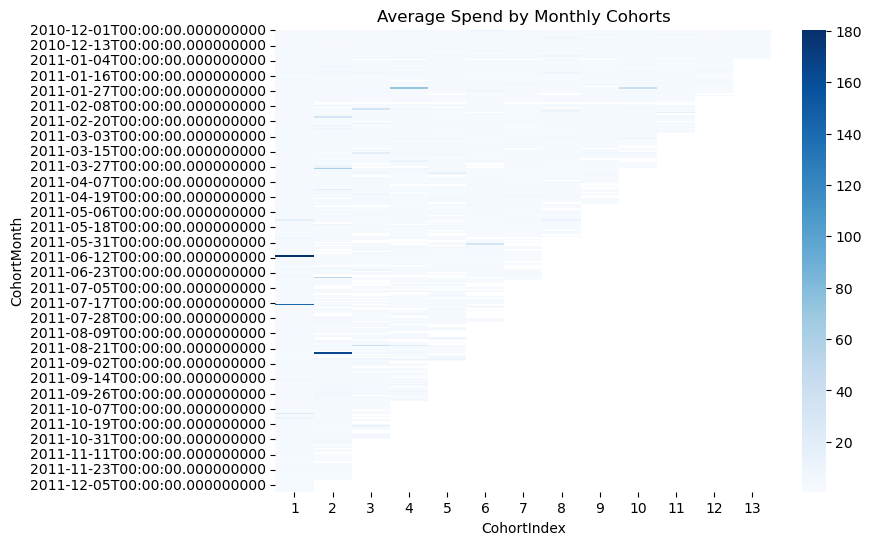

In [25]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=average_price, cmap='Blues')
plt.show()

# RFM Analysis

In [26]:
import datetime as dt

In [27]:
retail_df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [28]:
today_day = max(retail_df.InvoiceDate) + dt.timedelta(days = 1)
today_day

Timestamp('2011-12-10 12:50:00')

In [29]:
rfm = retail_df.groupby("CustomerID").agg({"InvoiceDate": lambda date : (today_day-date.max()).days,
                                          "InvoiceNo" : lambda num : num.nunique(),
                                          "TotalPrice" : lambda TotalPrice : TotalPrice.sum()})
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [30]:
rfm.columns = ["Recency","Frequency","Monetary"]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [31]:
rfm = rfm[rfm["Monetary"] > 0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
12352.0,36,11,1545.41
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [32]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4320.0,90.359722,99.137988,1.000000e+00,17.000,49.50,138.00,374.00
Frequency,4320.0,5.117130,9.386392,1.000000e+00,1.000,3.00,6.00,248.00
Monetary,4320.0,1924.373832,8264.936833,7.105427e-15,302.435,657.85,1626.26,279489.02


# Modeling Data: RFM Analysis 

In [33]:
rfm['R'] = pd.qcut(rfm['Recency'],5,labels=range(5,0,-1))

In [34]:
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=range(1,6))

In [35]:
rfm['M'] = pd.qcut(rfm['Monetary'],5,labels=range(1,6))

In [36]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,7,4310.00,5,4,5
12348.0,75,4,1797.24,2,3,4
12349.0,19,1,1757.55,4,1,4
12350.0,310,1,334.40,1,1,2
12352.0,36,11,1545.41,3,5,4


In [37]:
rfm["RFM_Segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

In [38]:
rfm["RFM_Score"] = rfm[['R','F','M']].sum(axis=1)

In [39]:
rfm.sample(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
14739.0,2,8,3899.10,5,5,5,555,15
15048.0,65,5,380.57,3,4,2,342,9
15194.0,3,22,7521.17,5,5,5,555,15
13404.0,1,2,252.49,5,2,2,522,9
15245.0,134,3,2515.84,2,3,5,235,10
13065.0,373,1,205.86,1,1,1,111,3
15811.0,17,9,2171.32,4,5,5,455,14
12722.0,85,6,904.33,2,4,3,243,9
12712.0,23,17,4241.63,4,5,5,455,14


In [40]:
rfm.groupby('RFM_Score').agg({'Recency':"mean",'Frequency':"mean",'Monetary':["mean",'count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           283.3       1.0    143.9   190
4           229.2       1.1    207.6   339
5           175.8       1.3    293.4   344
6           128.1       1.5    371.4   426
7            91.9       1.8    475.7   389
8            81.1       2.3    629.0   385
9            68.5       3.0    856.7   330
10           52.8       3.6   1052.8   321
11           42.8       4.6   1418.8   337
12           31.8       5.8   1779.7   329
13           22.0       7.8   2655.3   291
14           14.3      11.3   4273.1   299
15            5.0      22.4  11160.4   340

In [41]:
def segment_me(df):
    if df['RFM_Score'] >= 12:
    	return 'Gold'
    elif (df['RFM_Score'] >= 7) and (df['RFM_Score'] < 11):
    	return 'Silver'
    else:
    	return 'Bronze'

In [42]:
rfm['General_Segment'] = rfm.apply(segment_me, axis=1)
rfm.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            159.5       2.0    510.4  1636
Gold               18.2      12.0   5107.6  1259
Silver             74.7       2.6    735.4  1425

In [43]:
rfm.sample(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
17865.0,31,27,10158.54,4,5,5,455,14,Gold
16298.0,23,3,598.20,4,3,3,433,10,Silver
17045.0,113,3,339.44,2,3,2,232,7,Silver
13814.0,56,3,1562.12,3,3,4,334,10,Silver
13967.0,146,1,80.70,2,1,1,211,4,Bronze
13635.0,68,1,1071.03,3,1,4,314,8,Silver
16780.0,100,2,425.19,2,3,2,232,7,Silver
13273.0,113,1,138.98,2,1,1,211,4,Bronze
16656.0,22,21,8568.24,4,5,5,455,14,Gold
